In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
import os
os.chdir("C:\\Users\\dalto\\Desktop\\Estágio\\Data Science")

dol = pd.read_excel("PredDolarInv3.xlsx")
dol

,Data,Abertura,Máxima,Mínima,Fechamento,BollingerSup,BollingerInf
0,2014-01-02,3841.71,3895.47,3841.71,3860.16,3885.81,3737.85
1,2014-01-03,3846.52,3860.97,3828.07,3842.51,3886.74,3737.68
2,2014-01-06,3835.29,3854.55,3832.08,3846.52,3884.99,3738.32
3,2014-01-07,3835.29,3840.10,3805.60,3832.88,3872.71,3744.58
4,2014-01-08,3838.50,3872.20,3823.25,3869.79,3878.76,3741.86
...,...,...,...,...,...,...,...
1887,2021-08-19,5427.50,5464.50,5388.50,5425.50,5387.28,5096.27
1888,2021-08-20,5455.00,5484.00,5373.00,5383.00,5407.33,5092.02
1889,2021-08-23,5373.50,5408.50,5352.00,5388.00,5425.92,5092.19
1890,2021-08-24,5370.00,5370.50,5251.00,5257.00,5426.34,5098.23


In [179]:
dol.isna().sum()

Data            0
Abertura        0
Máxima          0
Mínima          0
Fechamento      0
BollingerSup    0
BollingerInf    0
dtype: int64

In [180]:
# Ajustando a data - precisamos transformá-la nos índices do data frame
#dol["Data"] = pd.to_datetime(dol["Data"]).dt.normalize()

#dol = dol.set_index("Data")

In [181]:
dol["Alvo"] = np.where(dol["Fechamento"].shift(-1) > dol["Fechamento"] , 'Alta', 'Baixa')

In [182]:
dol["Alvo"].value_counts(normalize=True)*100

Alta     50.422833
Baixa    49.577167
Name: Alvo, dtype: float64

In [183]:
# Construção das Variáveis

dol["DistBoll"] = (dol["BollingerSup"] - dol["BollingerInf"])
dol["DistBoll-1"] = dol["DistBoll"].shift(1)
dol["DistBoll-2"] = dol["DistBoll"].shift(2)
dol["DistBoll-3"] = dol["DistBoll"].shift(3)

dol["MMDistBoll15"] = dol["DistBoll"].rolling(15).mean()

# Desvio Padrão de 5 dias
dol["std5"] = dol["Fechamento"].rolling(5).std()

# Desvio Padrão de 10 dias
#dol["std10"] = dol["Fechamento"].rolling(10).std()

# Desvio Padrão de 15 dias
dol["std15"] = dol["Fechamento"].rolling(15).std()

# Proporção do corpo do candle em relação ao range do dia
dol["prop"] = (dol["Fechamento"]-dol["Abertura"])/(dol["Máxima"]-dol["Mínima"])
dol["prop-1"] = dol["prop"].shift(1)
dol["prop-2"] = dol["prop"].shift(2)
dol["prop-3"] = dol["prop"].shift(3)

# Direção do dia atual
dol["dirD"] = np.where(dol["Fechamento"] > dol["Abertura"], '1', '0')

# Direção D-1
dol["dirD-1"] = dol["dirD"].shift(1)
dol["dirD-2"] = dol["dirD"].shift(2)
dol["dirD-3"] = dol["dirD"].shift(3)


# Média móvel de 15 dias
dol["MM"] = dol["Fechamento"].rolling(15).mean()

# Zscore
dol["zscore"] = (dol["Fechamento"]-dol["MM"])/dol["std15"]
dol["zscore-1"] = dol["zscore"].shift(1)
dol["zscore-2"] = dol["zscore"].shift(2)
dol["zscore-3"] = dol["zscore"].shift(3)
#dol["zscore-4"] = dol["zscore"].shift(4)
#dol["zscore-5"] = dol["zscore"].shift(5)

# RSL
dol["RSL"] = (dol["Fechamento"]/dol["MM"])-1


dol["Pips"] = (dol["Fechamento"].shift(1) - dol["Fechamento"])
dol["Pips-1"] = dol["Pips"].shift(1)
dol["Pips-2"] = dol["Pips"].shift(2)
dol["Pips-3"] = dol["Pips"].shift(3)



In [184]:
dol["std5"] = pd.qcut(dol["std5"], 10, labels = False)
dol["std15"] = pd.qcut(dol["std15"], 10, labels = False)
dol["DistBoll"] = pd.qcut(dol["DistBoll"], 10, labels = False)
dol["prop"] = pd.qcut(dol["prop"], 10, labels = False)
dol["MMDistBoll15"] = pd.qcut(dol["MMDistBoll15"], 10, labels = False)

In [185]:
dol.head()

,Data,Abertura,Máxima,Mínima,Fechamento,BollingerSup,BollingerInf,Alvo,DistBoll,DistBoll-1,...,MM,zscore,zscore-1,zscore-2,zscore-3,RSL,Pips,Pips-1,Pips-2,Pips-3
0,2014-01-02,3841.71,3895.47,3841.71,3860.16,3885.81,3737.85,Baixa,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-03,3846.52,3860.97,3828.07,3842.51,3886.74,3737.68,Alta,1,147.96,...,NaN,NaN,NaN,NaN,NaN,NaN,17.65,NaN,NaN,NaN
2,2014-01-06,3835.29,3854.55,3832.08,3846.52,3884.99,3738.32,Baixa,1,149.06,...,NaN,NaN,NaN,NaN,NaN,NaN,-4.01,17.65,NaN,NaN
3,2014-01-07,3835.29,3840.10,3805.60,3832.88,3872.71,3744.58,Alta,1,146.67,...,NaN,NaN,NaN,NaN,NaN,NaN,13.64,-4.01,17.65,NaN
4,2014-01-08,3838.50,3872.20,3823.25,3869.79,3878.76,3741.86,Baixa,1,128.13,...,NaN,NaN,NaN,NaN,NaN,NaN,-36.91,13.64,-4.01,17.65


In [186]:
dol = dol.drop(["Abertura","Fechamento", "Mínima", "Máxima", "BollingerSup", "BollingerInf"], axis = 1)
#"std5", "std15",

In [187]:
dol = dol.fillna(method = "ffill")

In [188]:
dol = dol.dropna(axis=0)

In [189]:
dol.isna().sum().sum()

0

In [190]:
dol["Data"] = pd.to_datetime(dol["Data"]).dt.normalize()
dol = dol.set_index("Data")
dol.head()

,Alvo,DistBoll,DistBoll-1,DistBoll-2,DistBoll-3,MMDistBoll15,std5,std15,prop,prop-1,...,MM,zscore,zscore-1,zscore-2,zscore-3,RSL,Pips,Pips-1,Pips-2,Pips-3
Data,,,,,,,,,,,,,,,,,,,,,
2014-01-27,Baixa,1,119.18,114.09,117.37,0.0,5.0,2.0,8,-0.571382,...,3823.629333,1.939168,1.190162,1.319251,-0.001808,0.018789,-36.91,1.60,-40.92,-19.25
2014-01-28,Alta,1,135.28,119.18,114.09,0.0,4.0,2.0,7,0.584493,...,3827.534000,1.560046,1.939168,1.190162,1.319251,0.016699,4.02,-36.91,1.60,-40.92
2014-01-29,Baixa,2,141.99,135.28,119.18,0.0,3.0,3.0,7,0.548876,...,3830.529333,1.844056,1.560046,1.939168,1.190162,0.021979,-23.27,4.02,-36.91,1.60
2014-01-30,Alta,2,158.78,141.99,135.28,0.0,2.0,3.0,0,0.450880,...,3831.171333,0.819393,1.844056,1.560046,1.939168,0.009871,45.73,-23.27,4.02,-36.91
2014-01-31,Alta,2,160.06,158.78,141.99,1.0,1.0,3.0,5,-0.901352,...,3835.342667,0.769832,0.819393,1.844056,1.560046,0.009396,-2.39,45.73,-23.27,4.02


In [191]:
### Separando os dados entre treinamento e teste
# Como estamos treinando um modelo com base temporal vamos separar a mão os períodos

# Treinamento de 20017 a 2020.1
#sTrain = "2017-02-14"
#eTrain = "2018-12-28"
# Teste de 2020.2 até agora 
#sTest = "2020-07-01"
#eTest = "2021-08-13"

#dolTrain = dol[dol["Data"] <= eTrain]
#dolTest = dol[dol["Data"] > eTrain]
###

sTrain = "2014-02-12"
eTrain = "2017-12-31"
# Teste de 2020.2 até agora 
sTest = "2018-01-01"
eTest = "2021-08-25"


dolTrain = dol[sTrain : eTrain]
dolTest = dol[sTest : eTest]

In [192]:
dolTrain.tail()

,Alvo,DistBoll,DistBoll-1,DistBoll-2,DistBoll-3,MMDistBoll15,std5,std15,prop,prop-1,...,MM,zscore,zscore-1,zscore-2,zscore-3,RSL,Pips,Pips-1,Pips-2,Pips-3
Data,,,,,,,,,,,,,,,,,,,,,
2017-12-21,Alta,1,143.44,146.64,145.55,1.0,0.0,1.0,8,0.540213,...,3673.741333,0.623473,0.322260,0.167074,0.356758,0.005346,-11.72,-7.81,2.79,3.35
2017-12-22,Baixa,1,139.80,143.44,146.64,1.0,2.0,1.0,9,0.608084,...,3678.910667,1.340350,0.623473,0.322260,0.167074,0.011968,-29.56,-11.72,-7.81,2.79
2017-12-26,Alta,1,144.47,139.80,143.44,1.0,1.0,1.0,1,0.844989,...,3683.224667,0.339686,1.340350,0.623473,0.322260,0.002757,29.56,-29.56,-11.72,-7.81
2017-12-27,Baixa,1,138.19,144.47,139.80,1.0,1.0,0.0,6,-0.730438,...,3688.096667,0.405597,0.339686,1.340350,0.623473,0.002794,-5.02,29.56,-29.56,-11.72
2017-12-28,Baixa,0,123.19,138.19,144.47,1.0,0.0,0.0,6,0.357234,...,3693.303333,0.205927,0.405597,0.339686,1.340350,0.000928,1.67,-5.02,29.56,-29.56


In [193]:
print(dolTrain.shape)
print(dolTest.shape)


(960, 26)
(903, 26)


In [194]:
xTrain = dolTrain.drop("Alvo", axis = 1)
yTrain = dolTrain["Alvo"]

xTest = dolTest.drop("Alvo", axis = 1)
yTest = dolTest["Alvo"]

In [195]:
yTest

Data
2018-01-02    Baixa
2018-01-03    Baixa
2018-01-04    Baixa
2018-01-05     Alta
2018-01-08     Alta
              ...  
2021-08-19    Baixa
2021-08-20     Alta
2021-08-23    Baixa
2021-08-24    Baixa
2021-08-25    Baixa
Name: Alvo, Length: 903, dtype: object

# Passo 7 - Treinamento do modelo

In [196]:
#xTrain = xTrain.set_index("Data")
#xTest = xTest.set_index("Data")

In [197]:
from sklearn.tree import DecisionTreeClassifier

modTree = DecisionTreeClassifier()

modTree.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [198]:
predTrain = modTree.predict(xTrain)
predTest = modTree.predict(xTest)


# Passo 8 - Avaliação dos resultados

In [199]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(yTrain, predTrain))
print()
print("------------------------------------------------")
print()
print(classification_report(yTrain,predTrain))
import sklearn.metrics as metrics

print("Acurácia: ", round(metrics.accuracy_score(yTrain, predTrain)*100,3))

[[460   0]
 [  0 500]]

------------------------------------------------

              precision    recall  f1-score   support

        Alta       1.00      1.00      1.00       460
       Baixa       1.00      1.00      1.00       500

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960

Acurácia:  100.0


In [200]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(yTest, predTest))
print()
print("------------------------------------------------")
print()
print(classification_report(yTest,predTest))
import sklearn.metrics as metrics

print("Acurácia: ", round(metrics.accuracy_score(yTest, predTest)*100,3))

[[238 243]
 [194 228]]

------------------------------------------------

              precision    recall  f1-score   support

        Alta       0.55      0.49      0.52       481
       Baixa       0.48      0.54      0.51       422

    accuracy                           0.52       903
   macro avg       0.52      0.52      0.52       903
weighted avg       0.52      0.52      0.52       903

Acurácia:  51.606


In [201]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

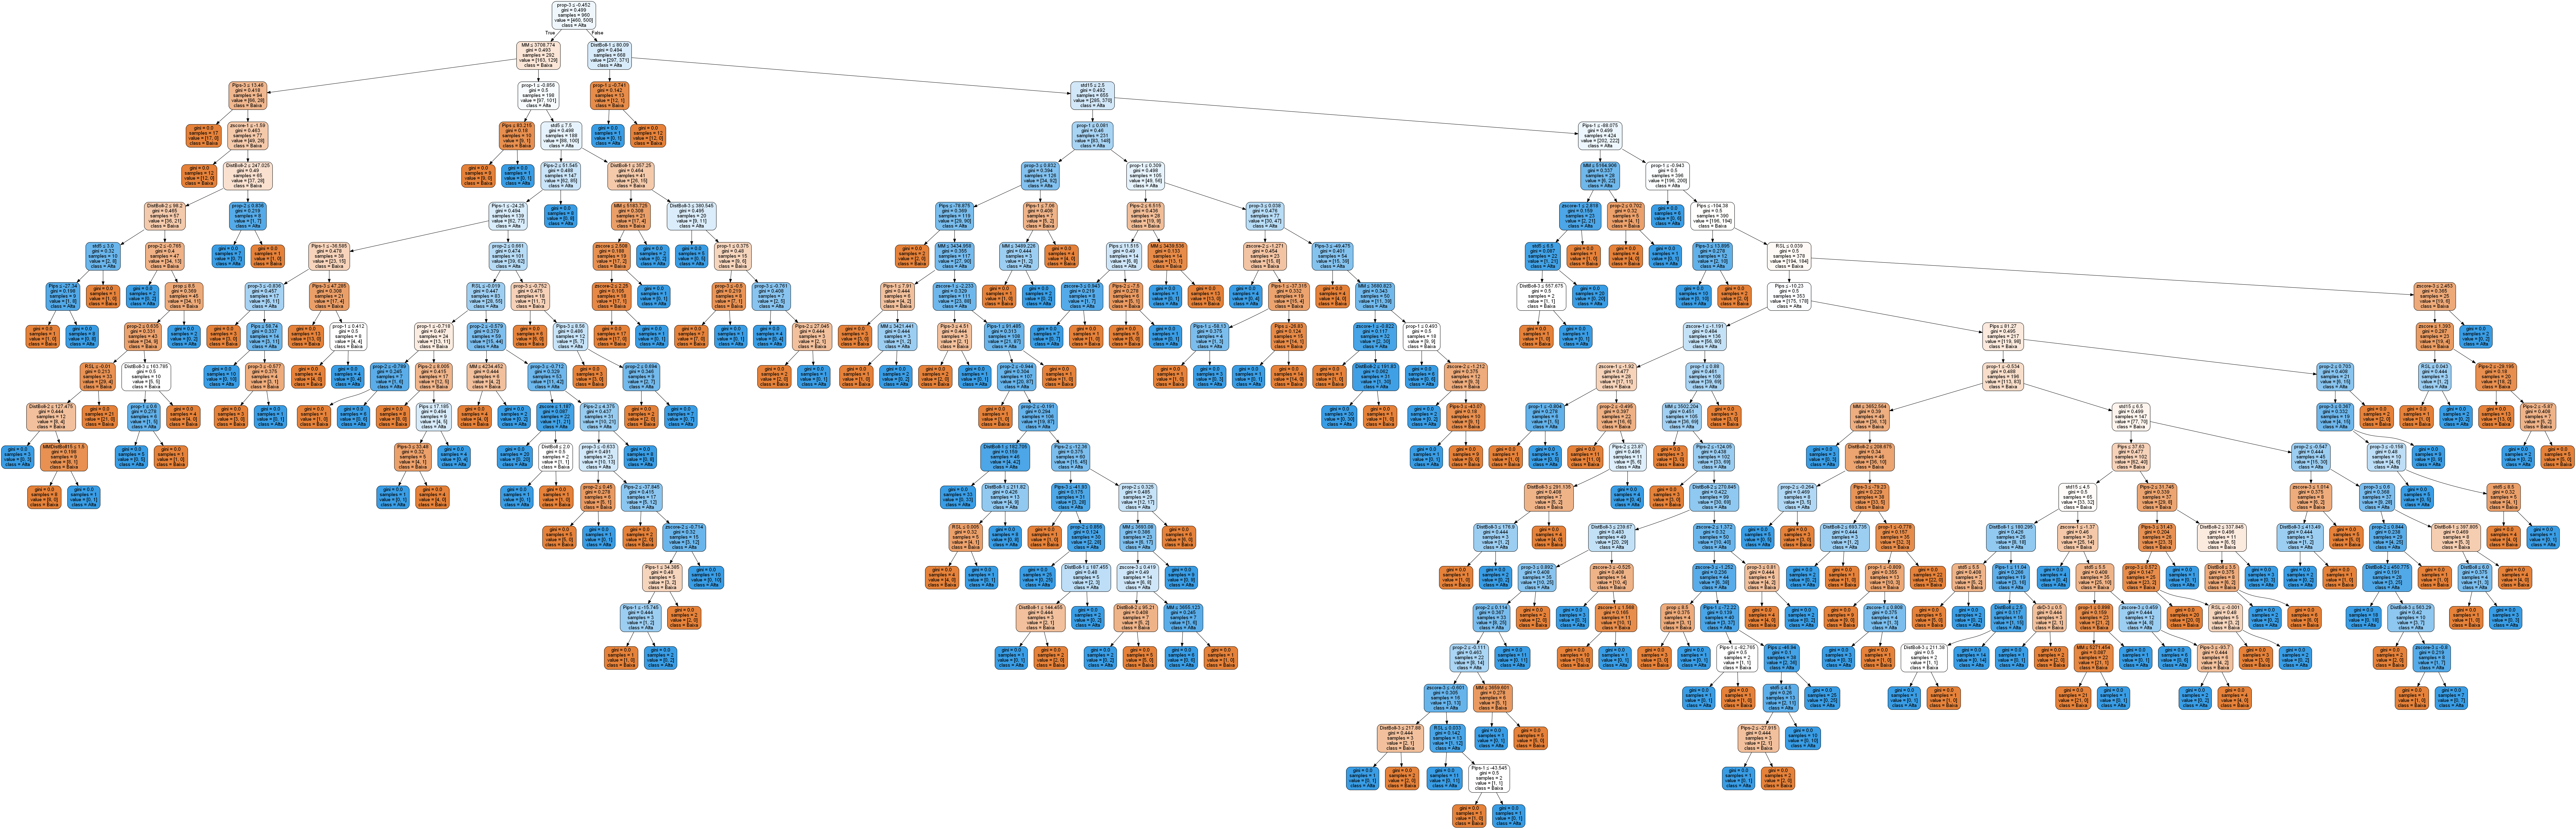

In [202]:
from six import StringIO #from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(modTree
                , out_file = dot_data
                , filled = True
                , rounded = True
                , special_characters = True
                , feature_names = xTrain.columns
                , class_names = ['Baixa', 'Alta'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('arvore3.png')

Image(graph.create_png())

In [203]:
dolTest.loc[:,"Previsto"] = predTest

C:\Users\dalto\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\dalto\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [204]:
dolTest["Previsto"].astype(str)

Data
2018-01-02    Baixa
2018-01-03     Alta
2018-01-04     Alta
2018-01-05     Alta
2018-01-08     Alta
              ...  
2021-08-19     Alta
2021-08-20     Alta
2021-08-23    Baixa
2021-08-24     Alta
2021-08-25     Alta
Name: Previsto, Length: 903, dtype: object

In [205]:
# ajustando o retorno em pips com o resultado do modelo

# variação em Pips
dolTest["Pips"] = (dolTest["Fechamento"].shift(1) - dolTest["Fechamento"])
dolTest.loc[:, "RetPips"] = np.where(dolTest.loc[:,"Previsto"] == "Alta", dolTest.loc[:,'Pips'], '0')
dolTest.loc[:, "RetPips"] = np.where(dolTest.loc[:,"Previsto"] == "Baixa", -1*dolTest.loc[:,'Pips'], dolTest.loc[:,"RetPips"])

KeyError: 'Fechamento'

In [ ]:
dolTest.loc[:, "RetPips"] =  dolTest["RetPips"].astype(float)

In [ ]:
dolTest.loc[:, "RetPipsAcumulado"] = dolTest["RetPips"].cumsum()

In [ ]:
dolTest.loc[:,"RetPipsAcumulado"].tail()

In [ ]:
dolTest["RetPipsAcumulado"].plot(figsize = (13,9)
                              ,linewidth = 3
                              ,fontsize = 15)
plt.xlabel('Periodos'
          , fontsize = 15)
plt.ylabel('Pips'
          , fontsize = 15)
plt.legend();

# Passo 9 - Aperfeiçoamento do modelo

In [ ]:
#doltest = dolTest.drop(["Pips"], axis = 1)

In [278]:
from sklearn.tree import DecisionTreeClassifier

modTree = DecisionTreeClassifier(criterion = "gini", max_depth = 20) #23

modTree.fit(xTrain,yTrain)

DecisionTreeClassifier(max_depth=20)

In [279]:
predTest = modTree.predict(xTest)

In [280]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(yTest, predTest))
print()
print("------------------------------------------------")
print()
print(classification_report(yTest,predTest))
import sklearn.metrics as metrics

print("Acurácia: ", round(metrics.accuracy_score(yTest, predTest)*100,3))

[[231 250]
 [192 230]]

------------------------------------------------

              precision    recall  f1-score   support

        Alta       0.55      0.48      0.51       481
       Baixa       0.48      0.55      0.51       422

    accuracy                           0.51       903
   macro avg       0.51      0.51      0.51       903
weighted avg       0.51      0.51      0.51       903

Acurácia:  51.052


In [ ]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [124]:
#from six import StringIO #from sklearn.externals.six import StringIO
#from IPython.display import Image
#from sklearn.tree import export_graphviz
#import pydotplus

#dot_data = StringIO()

#export_graphviz(modTree
#                , out_file = dot_data
#                , filled = True
#                , rounded = True
#                , special_characters = True
#                , feature_names = xTrain.columns
#                , class_names = ['Baixa', 'Alta'])
#
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#
#graph.write_png('Narvore3.png')
#
#Image(graph.create_png())

In [125]:
dolTest.loc[:,"Previsto"] = predTest

dolTest["Previsto"].value_counts(normalize=True)*100

C:\Users\dalto\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Baixa    54.407295
Alta     45.592705
Name: Previsto, dtype: float64

In [126]:
#dolTest["Previsto"].astype(str)
dolTest["Previsto"].tail(11)

Data
2021-08-11    Baixa
2021-08-12     Alta
2021-08-13    Baixa
2021-08-16     Alta
2021-08-17    Baixa
2021-08-18     Alta
2021-08-19    Baixa
2021-08-20     Alta
2021-08-23     Alta
2021-08-24     Alta
2021-08-25    Baixa
Name: Previsto, dtype: object

In [127]:
dolTest["Alvo"].tail(11)

Data
2021-08-11     Alta
2021-08-12    Baixa
2021-08-13     Alta
2021-08-16     Alta
2021-08-17     Alta
2021-08-18     Alta
2021-08-19    Baixa
2021-08-20     Alta
2021-08-23    Baixa
2021-08-24    Baixa
2021-08-25    Baixa
Name: Alvo, dtype: object

In [78]:
# ajustando o retorno em pips com o resultado do modelo

dolTest.loc[:, "RetPips"] = np.where(dolTest.loc[:,"Previsto"] == "Alta", dolTest.loc[:,'Pips'], '0')
dolTest.loc[:, "RetPips"] = np.where(dolTest.loc[:,"Previsto"] == "Baixa", -1*dolTest.loc[:,'Pips'], dolTest.loc[:,"RetPips"])

In [79]:
dolTest.loc[:, "RetPips"] =  dolTest["RetPips"].astype(float)

In [80]:
dolTest.loc[:, "RetPipsAcumulado"] = dolTest["RetPips"].cumsum()

In [81]:
dolTest.loc[:,"RetPipsAcumulado"].tail()

Data
2021-08-19    2994.78
2021-08-20    2952.28
2021-08-23    2957.28
2021-08-24    3088.28
2021-08-25    3127.78
Name: RetPipsAcumulado, dtype: float64

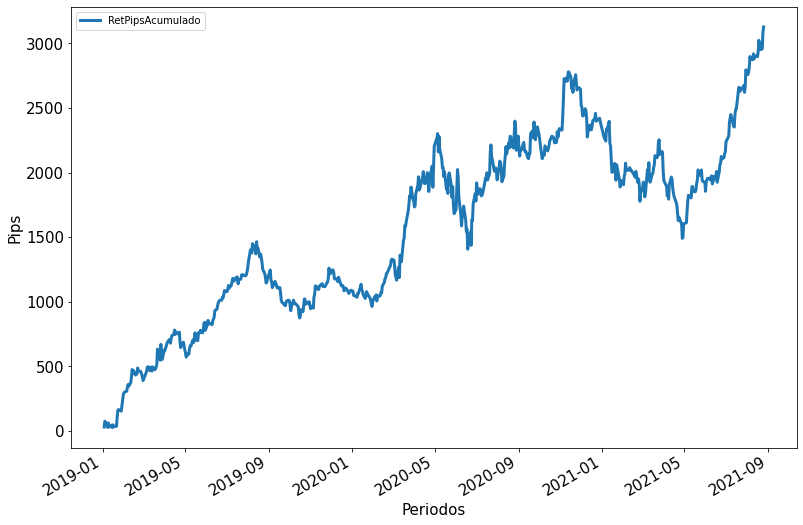

In [82]:
dolTest["RetPipsAcumulado"].plot(figsize = (13,9)
                              ,linewidth = 3
                              ,fontsize = 15)
plt.xlabel('Periodos'
          , fontsize = 15)
plt.ylabel('Pips'
          , fontsize = 15)
plt.legend();

In [ ]:
# EXPORTANDO A BASE DE DADOS

#dfTest.to_csv("resultados_arvore.csv", index = True, header = True)

In [ ]:
dol.tail(3)

In [ ]:
hoje = pd.Series( data = {"Abertura": 1.119, "Máxima" : 1.1200, "Mínima" : 1.155, "Fechamento" : 1.16}, name = "2021-08-16")

dol = dol.append(hoje, ignore_index = False)

df.tail(3)